In [21]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt

In [2]:
num_classes = 10
(train_set_x, train_set_y), (test_set_x, test_set_y) = keras.datasets.mnist.load_data()

In [3]:
print(train_set_x.shape, train_set_y.shape, test_set_x.shape, test_set_y.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [4]:
test_img = train_set_x[200]
print(test_img.shape)

(28, 28)


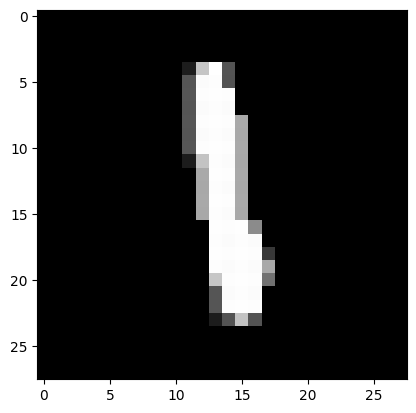

1


In [5]:
plt.imshow(test_img, cmap='gray')
plt.show()
print(train_set_y[200])

In [6]:
test_img.max()

255

In [7]:
train_set_x = train_set_x.astype('float32')/255
test_set_x = test_set_x.astype('float32')/255

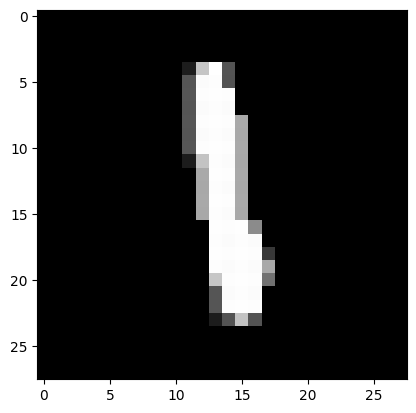

In [8]:
plt.imshow(train_set_x[200], cmap='gray')

In [9]:
train_set_x = np.expand_dims(train_set_x, -1)
test_set_x = np.expand_dims(test_set_x, -1)

In [10]:
print(train_set_x.shape, test_set_x.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [11]:
train_set_y[30]

3

In [12]:
train_set_y = keras.utils.to_categorical(train_set_y, num_classes)
test_set_y = keras.utils.to_categorical(test_set_y, num_classes)

In [13]:
train_set_y[30]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [14]:
input_shape =  (28, 28, 1)

In [15]:
model = keras.Sequential(
    [
    keras.Input(shape = input_shape),
    layers.Conv2D(32, kernel_size = (3, 3), activation = 'relu'), 
    layers.MaxPool2D(pool_size = (2, 2), strides=(1, 1)), 
    layers.Conv2D(64, kernel_size = (3, 3), activation = 'relu'), 
    layers.MaxPool2D(pool_size = (2, 2)), 
    layers.Flatten(),
    layers.Dense(500, activation = 'relu'),
    layers.Dense(num_classes, activation = 'softmax')
    ]
)

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 25, 25, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 11, 11, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 7744)              0         
                                                                 
 dense (Dense)               (None, 500)               3

In [32]:
# model = keras.Sequential(
#     [
#     keras.Input(shape = (250, 250, 3)),
#     layers.Flatten(),
#     layers.Dense(1024, activation = 'relu'), 
#     layers.Dense(512, activation = 'relu'), 
# #     layers.Conv2D(32, kernel_size = (3, 3), activation = 'relu'), 
# #     layers.MaxPool2D(pool_size = (2, 2), strides=(1, 1)), 
# #     layers.Conv2D(64, kernel_size = (3, 3), activation = 'relu'), 
# #     layers.MaxPool2D(pool_size = (2, 2)), 
# #     layers.Flatten(),
#     layers.Dense(256, activation = 'relu'),
#     layers.Dense(num_classes, activation = 'softmax')
#     ]
# )

In [33]:
# model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 187500)            0         
                                                                 
 dense_8 (Dense)             (None, 1024)              192001024 
                                                                 
 dense_9 (Dense)             (None, 512)               524800    
                                                                 
 dense_10 (Dense)            (None, 256)               131328    
                                                                 
 dense_11 (Dense)            (None, 10)                2570      
                                                                 
Total params: 192659722 (734.94 MB)
Trainable params: 192659722 (734.94 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
batch = 512
epoch = 100

In [22]:
model.compile(optimizer = 'Adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics = ['accuracy'])

In [23]:
hist = model.fit(train_set_x, train_set_y, epochs=epoch, batch_size=batch, validation_split=0.1)

Epoch 1/100


C:\Users\bhatt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\keras\src\backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


106/106 [==============================] - 84s 786ms/step - loss: 0.0853 - accuracy: 0.8800 - val_loss: 0.0181 - val_accuracy: 0.9807
Epoch 2/100
106/106 [==============================] - 82s 774ms/step - loss: 0.0158 - accuracy: 0.9801 - val_loss: 0.0125 - val_accuracy: 0.9865
Epoch 3/100
106/106 [==============================] - 84s 794ms/step - loss: 0.0110 - accuracy: 0.9862 - val_loss: 0.0093 - val_accuracy: 0.9900
Epoch 4/100
106/106 [==============================] - 86s 809ms/step - loss: 0.0081 - accuracy: 0.9897 - val_loss: 0.0086 - val_accuracy: 0.9900
Epoch 5/100
106/106 [==============================] - 82s 772ms/step - loss: 0.0064 - accuracy: 0.9920 - val_loss: 0.0076 - val_accuracy: 0.9903
Epoch 6/100
  1/106 [..............................] - ETA: 1:18 - loss: 0.0047 - accuracy: 0.9961

KeyboardInterrupt: 

In [25]:
score = model.evaluate(test_set_x, test_set_y, batch_size=512)

20/20 [==============================] - 3s 133ms/step - loss: 0.0078 - accuracy: 0.9896


In [26]:
predictions = model.predict(test_set_x)

313/313 [==============================] - 4s 13ms/step


In [30]:
print(np.argmax(predictions[0]))

7


In [31]:
predictions.shape

(10000, 10)

In [36]:
for i in predictions:
    print(np.argmax(i), i)

7 [4.7293909e-12 2.8159140e-13 2.0362360e-12 8.3465214e-12 4.0636243e-14
 2.7870374e-14 1.9604345e-19 1.0000000e+00 6.1277155e-12 3.1307710e-11]
2 [3.07988546e-09 2.58720956e-09 1.00000000e+00 3.04952976e-13
 1.32490666e-14 2.40853175e-14 2.06580575e-09 1.14862055e-14
 6.60315856e-12 1.29748832e-13]
1 [1.0167010e-08 9.9999988e-01 1.2544714e-09 4.1964800e-11 1.3351372e-07
 3.4120332e-11 9.9894741e-09 9.2790176e-09 2.2248509e-08 4.8226190e-10]
0 [1.0000000e+00 1.4290965e-11 6.4437310e-11 4.9167684e-11 3.6442083e-10
 1.0127629e-11 1.5187909e-09 1.5200712e-10 4.6822485e-13 1.2283173e-10]
4 [2.1958428e-11 6.5339084e-10 4.5587891e-12 2.5254528e-11 1.0000000e+00
 3.3355832e-14 3.2259887e-12 2.3237785e-12 7.6911019e-11 9.7393216e-10]
1 [3.8605816e-09 9.9999988e-01 5.2838334e-11 1.2969446e-12 1.0560434e-07
 4.7481512e-13 7.7556822e-11 4.3002089e-08 4.9127329e-09 1.1620656e-09]
4 [1.8910663e-15 3.5638926e-08 5.4509436e-10 7.8069571e-13 9.9999869e-01
 2.2009639e-11 6.2627165e-12 8.3222768e-10 1.0

4 [3.1906733e-16 9.2550456e-10 3.8132995e-12 8.1690744e-14 1.0000000e+00
 1.0191006e-12 1.1589384e-12 1.9551706e-14 2.4691915e-11 8.6309258e-11]
0 [1.00000000e+00 3.95393614e-12 1.01005489e-10 3.26425957e-15
 1.15849577e-13 1.91126653e-15 2.43688941e-11 3.75940896e-13
 1.08879156e-10 1.82720606e-13]
7 [6.7305175e-11 8.4447592e-08 9.2761587e-10 2.1433473e-07 1.2651279e-12
 1.2962343e-12 2.9357748e-17 9.9999940e-01 1.4936679e-08 2.8128238e-07]
0 [9.9998462e-01 2.2757963e-12 3.9717779e-10 8.0531055e-07 7.5538192e-10
 6.9812199e-06 2.6966259e-06 4.1214027e-10 4.9063819e-06 1.1733402e-08]
1 [3.0222513e-09 1.0000000e+00 6.2081802e-09 1.8703936e-10 6.3351524e-10
 6.9352553e-13 9.8346165e-10 2.4052085e-10 1.0723685e-08 3.3781419e-10]
9 [8.4918953e-02 5.0663418e-11 5.9762294e-07 1.5302714e-07 6.7066662e-06
 2.2677543e-07 2.4357250e-08 3.1040514e-07 1.0642757e-07 9.1507292e-01]
8 [1.5976087e-10 3.3911679e-10 1.2470968e-09 6.4189440e-09 1.7831556e-10
 8.7067931e-12 1.0803295e-15 1.1696124e-05 9.9

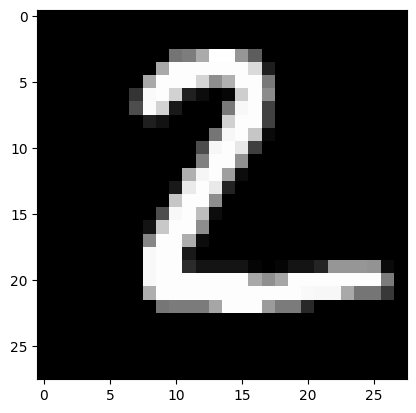

In [35]:
plt.imshow(test_set_x[1], cmap='gray')